In [2]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import open3d as o3d

from dotenv import load_dotenv, find_dotenv
from pathlib import Path

# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()
project_dir = Path(dotenv_path).parent

# load up the entries as environment variables
load_dotenv(dotenv_path)

True

# Data loading and exploration

In [4]:
raw_data_dir = project_dir/'data/raw/render_results'

syms_dirs = list(raw_data_dir.glob('simulacao*'))

sym_dir = np.random.choice(syms_dirs)
img_fpath = np.random.choice(list(sym_dir.glob('*.png')))
img_fpath

PosixPath('/home/ctc_das/Desktop/part_counting/data/raw/render_results/simulacao927/simulacao927_0037.png')

In [5]:
img = o3d.io.read_image(str(img_fpath))
img

Image of size 512x512, with 4 channels.
Use numpy.asarray to access buffer data.

In [6]:
img_data = np.asarray(img)
img_data.shape

(512, 512, 4)

/home/ctc_das/Desktop/part_counting/data/raw/render_results/simulacao380/simulacao380_0064.png


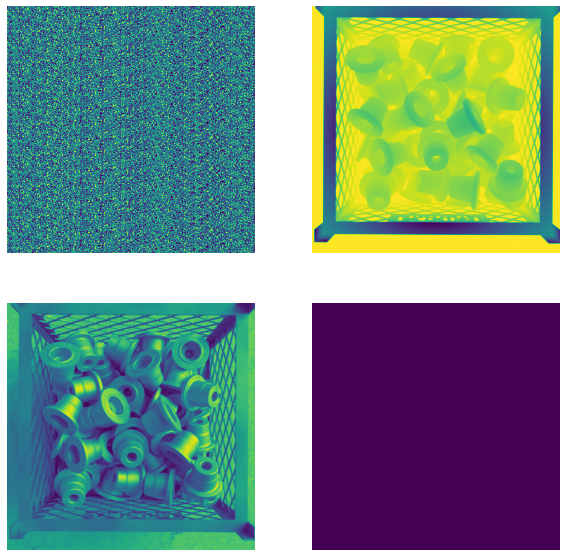

In [11]:
%matplotlib inline

img_fpath = np.random.choice(list(raw_data_dir.glob('simulacao*/*.png')))
img_fpath = Path('/home/ctc_das/Desktop/part_counting/data/raw/render_results/simulacao380/simulacao380_0064.png')
print(img_fpath)

img_data = np.asarray(o3d.io.read_image(str(img_fpath)))

fig, axs = plt.subplots(2,2)
fig.set_size_inches(10,10)
for i, ax in enumerate(axs.flatten()):
    ax.imshow(img_data[:,:,i])
    ax.set_axis_off()

fig.show()

In [35]:
%matplotlib widget


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

depth = 207 - img_data[:,:,1]

# create the x and y coordinate arrays (here we just use pixel indices)
xx, yy = np.mgrid[0:depth.shape[0], 0:depth.shape[1]]
# xx, yy = np.mgrid[0:200, 0:200]

# create the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, depth, rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0)

# show it
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/tmp/ipykernel_1509325/2354960673.py:16: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
